## Experimento No.7 - Neural Network

### Load data and import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from dython.nominal import associations
from sklearn.preprocessing import TargetEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
%matplotlib inline

pd.set_option('display.max_rows', 50)
warnings.filterwarnings('ignore')

In [2]:
RANDOM_SEED = 42

In [3]:
df_train_full = pd.read_csv('data/train.csv')
df_test_full = pd.read_csv('data/test.csv')
df_train_full.head().T

,0,1,2,3,4
ID,904256,645256,308367,470353,989032
PERIODO,20212,20212,20203,20195,20212
ESTU_PRGM_ACADEMICO,ENFERMERIA,DERECHO,MERCADEO Y PUBLICIDAD,ADMINISTRACION DE EMPRESAS,PSICOLOGIA
ESTU_PRGM_DEPARTAMENTO,BOGOTÁ,ATLANTICO,BOGOTÁ,SANTANDER,ANTIOQUIA
ESTU_VALORMATRICULAUNIVERSIDAD,Entre 5.5 millones y menos de 7 millones,Entre 2.5 millones y menos de 4 millones,Entre 2.5 millones y menos de 4 millones,Entre 4 millones y menos de 5.5 millones,Entre 2.5 millones y menos de 4 millones
ESTU_HORASSEMANATRABAJA,Menos de 10 horas,0,Más de 30 horas,0,Entre 21 y 30 horas
FAMI_ESTRATOVIVIENDA,Estrato 3,Estrato 3,Estrato 3,Estrato 4,Estrato 3
FAMI_TIENEINTERNET,Si,No,Si,Si,Si
FAMI_EDUCACIONPADRE,Técnica o tecnológica incompleta,Técnica o tecnológica completa,Secundaria (Bachillerato) completa,No sabe,Primaria completa
FAMI_TIENELAVADORA,Si,Si,Si,Si,Si


In [4]:
df_train_full.shape

(692500, 17)

### EDA

In [5]:
df_analysis = df_train_full.copy()
df_analysis.drop('ID', axis=1, inplace=True)
df_analysis['PERIODO'] = df_analysis['PERIODO'].astype(str).apply(lambda text: text[:4])

df_analysis.isna().sum()

PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_TIENELAVADORA                39773
FAMI_TIENEAUTOMOVIL               43623
ESTU_PRIVADO_LIBERTAD                 0
ESTU_PAGOMATRICULAPROPIO           6498
FAMI_TIENECOMPUTADOR              38103
FAMI_TIENEINTERNET.1              26629
FAMI_EDUCACIONMADRE               23664
RENDIMIENTO_GLOBAL                    0
dtype: int64

In [6]:
df_analysis.describe(include='object')

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
count,692500,692500,692500,686213,661643,660363,665871,669322,652727,648877,692500,686002,654397,665871,668836,692500
unique,4,948,31,8,5,7,2,12,2,2,2,2,2,2,12,4
top,2019,DERECHO,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
freq,182510,53244,282159,204048,249352,232671,592514,128289,563390,412606,692466,382201,597670,592514,141744,175619


In [7]:
df_analysis['FAMI_EDUCACIONMADRE'].unique()

array(['Postgrado', 'Técnica o tecnológica incompleta',
       'Secundaria (Bachillerato) completa', 'Primaria completa',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) incompleta',
       'Educación profesional incompleta',
       'Educación profesional completa', 'Primaria incompleta', nan,
       'Ninguno', 'No Aplica', 'No sabe'], dtype=object)

In [8]:
df_analysis['FAMI_ESTRATOVIVIENDA'].unique()

array(['Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 2', 'Estrato 1',
       nan, 'Estrato 6', 'Sin Estrato'], dtype=object)

In [9]:
df_analysis['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts()

ESTU_VALORMATRICULAUNIVERSIDAD
Entre 1 millón y menos de 2.5 millones      204048
Entre 2.5 millones y menos de 4 millones    127430
Menos de 500 mil                             80263
Entre 500 mil y menos de 1 millón            78704
Entre 4 millones y menos de 5.5 millones     69736
Más de 7 millones                            68014
Entre 5.5 millones y menos de 7 millones     38490
No pagó matrícula                            19528
Name: count, dtype: int64

In [10]:
df_analysis['ESTU_HORASSEMANATRABAJA'].value_counts()

ESTU_HORASSEMANATRABAJA
Más de 30 horas        249352
0                      116550
Entre 11 y 20 horas    115857
Entre 21 y 30 horas     92693
Menos de 10 horas       87191
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='ESTU_VALORMATRICULAUNIVERSIDAD'>

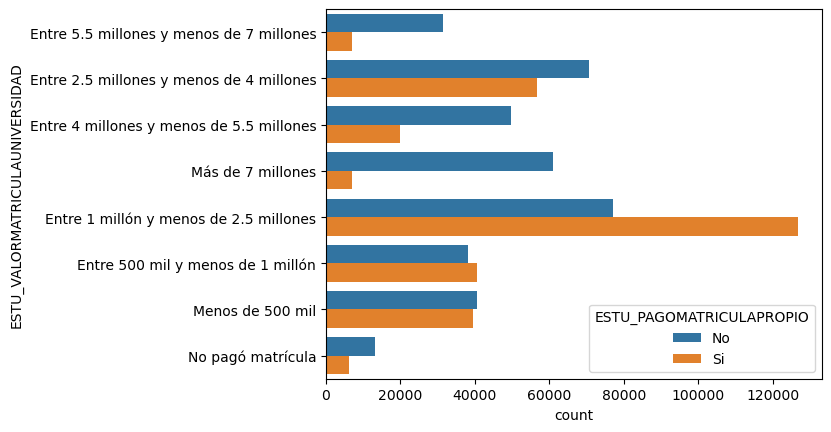

In [11]:
sns.countplot(df_analysis, y='ESTU_VALORMATRICULAUNIVERSIDAD', hue='ESTU_PAGOMATRICULAPROPIO')

### Correlation Pre-processing

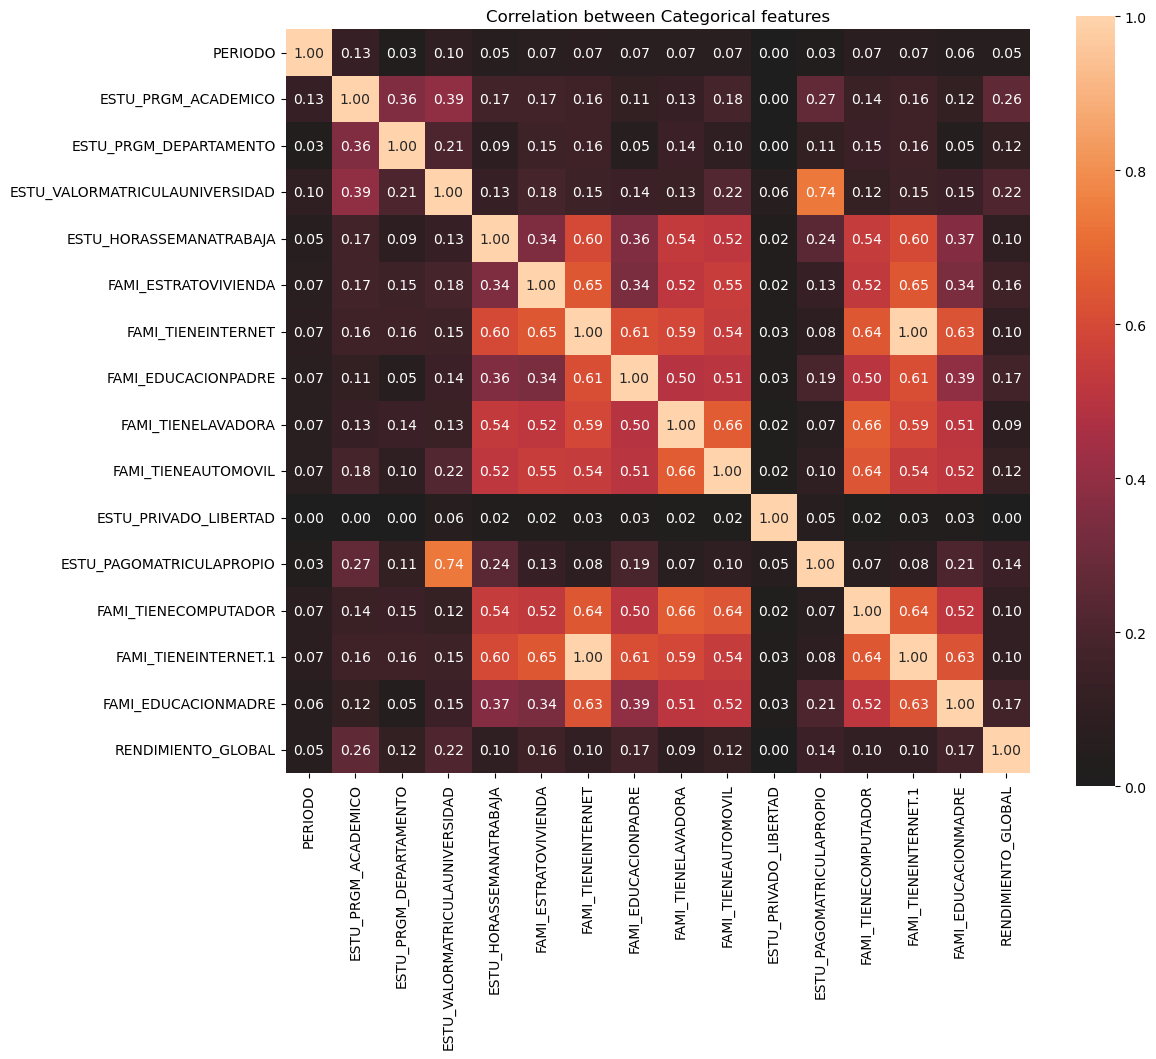

In [12]:
associations(df_analysis, figsize=(12, 10), title='Correlation between Categorical features')
plt.show()

### Preprocessing

#### Cleaning Features
- Drop `ID` and `FAMI_TIENEINTERNET.1` which is duplicated
- Remove weird characters in `ESTU_PGRM_ACADEMICO`, group rare values into one category
- Do feature engineering to `EDUCACIONPADRE - MADRE` **(Next experiment)**
- Replace 0 for 'No trabaja' in `ESTU_HORASSEMANATRABAJA`


In [13]:
def clean_data(df: pd.DataFrame): 
    new_df = df.copy() # Create a copy

    # Drop and clean columns
    new_df.drop(['ID', 'FAMI_TIENEINTERNET.1', 'ESTU_PRIVADO_LIBERTAD'], axis=1, inplace=True)
    new_df['PERIODO'] = new_df['PERIODO'].astype(str).apply(lambda text: text[:4])

    return new_df

# Clean data in both train and test
df_train = clean_data(df_train_full)
df_test = clean_data(df_test_full)

In [14]:
def normalize_text(text: str):
    """Removes any weird character like accents from a string"""
    import unicodedata

    if not pd.isna(text):
        return (
            unicodedata.normalize('NFKD', text)
            .encode('ASCII', 'ignore')
            .decode('utf-8')
        )
    return text

def group_rare_values(data: pd.DataFrame, col: str, threshold: float = 0.01):
    """Groups rare values into a unique category"""
    percentajes = data[col].value_counts(normalize=True)
    group_values = lambda value: 'OTRO' if percentajes[value] < threshold else value

    return data[col].apply(group_values)
    

# Remove weird characters from values
for col in ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE']:
    df_train[col] = df_train[col].apply(normalize_text)
    df_test[col] = df_test[col].apply(normalize_text)

# Group rare values into one category
for col in ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO']:

    if col == 'ESTU_PGRM_ACADEMICO':
        df_train[col] = group_rare_values(df_train, col, threshold=0.001)
        df_test[col] = group_rare_values(df_test, col, threshold=0.001)
    else:
        df_train[col] = group_rare_values(df_train, col)
        df_test[col] = group_rare_values(df_test, col)

In [15]:
# Replace values to make more sense
df_train['ESTU_HORASSEMANATRABAJA'] = df_train['ESTU_HORASSEMANATRABAJA'].replace('0', 'No trabaja')
df_train['FAMI_EDUCACIONPADRE'] = df_train['FAMI_EDUCACIONPADRE'].replace(['No Aplica', 'No sabe'], 'Ninguno')
df_train['FAMI_EDUCACIONMADRE'] = df_train['FAMI_EDUCACIONMADRE'].replace(['No Aplica', 'No sabe'], 'Ninguno')

df_test['ESTU_HORASSEMANATRABAJA'] = df_test['ESTU_HORASSEMANATRABAJA'].replace('0', 'No trabaja')
df_test['FAMI_EDUCACIONPADRE'] = df_test['FAMI_EDUCACIONPADRE'].replace(['No Aplica', 'No sabe'], 'Ninguno')
df_test['FAMI_EDUCACIONMADRE'] = df_test['FAMI_EDUCACIONMADRE'].replace(['No Aplica', 'No sabe'], 'Ninguno')

#### Imputation
- There's only 6 social classes in Colombia, therefore we can use 'Sin Estrato' or mode
- Use mode for Binary Features
- Use 'No trabaja' for `ESTU_HORASSEMANATRABAJA`
- Use 'Ninguno' for `EDUCACIONPADRE - MADRE`
- Use mode for `MATRICULA` (this can change to 'No pago matricula')

In [16]:
def impute_cols(df: pd.DataFrame):
    new_df = df.copy() # Make a copy

    # Impute with own values
    new_df['FAMI_ESTRATOVIVIENDA'] = new_df['FAMI_ESTRATOVIVIENDA'].fillna('Sin Estrato')
    new_df['ESTU_HORASSEMANATRABAJA'] = new_df['ESTU_HORASSEMANATRABAJA'].fillna('No trabaja')
    new_df['FAMI_EDUCACIONPADRE'] = new_df['FAMI_EDUCACIONPADRE'].fillna('Ninguno')
    new_df['FAMI_EDUCACIONMADRE'] = new_df['FAMI_EDUCACIONMADRE'].fillna('Ninguno')

    # Select binary columns
    binary_cols = [col for col in new_df.columns if new_df[col].nunique() == 2]
    for col in binary_cols + ['ESTU_VALORMATRICULAUNIVERSIDAD']:
        col_mode = new_df[col].mode()[0]
        new_df[col] = new_df[col].fillna(col_mode)

    return new_df

df_imputed = impute_cols(df_train)

In [17]:
df_imputed.isna().sum().sum() # Verify is all values were imputed

0

In [18]:
# Impute values in training and testing datasets
df_train = impute_cols(df_train)
df_test = impute_cols(df_test)

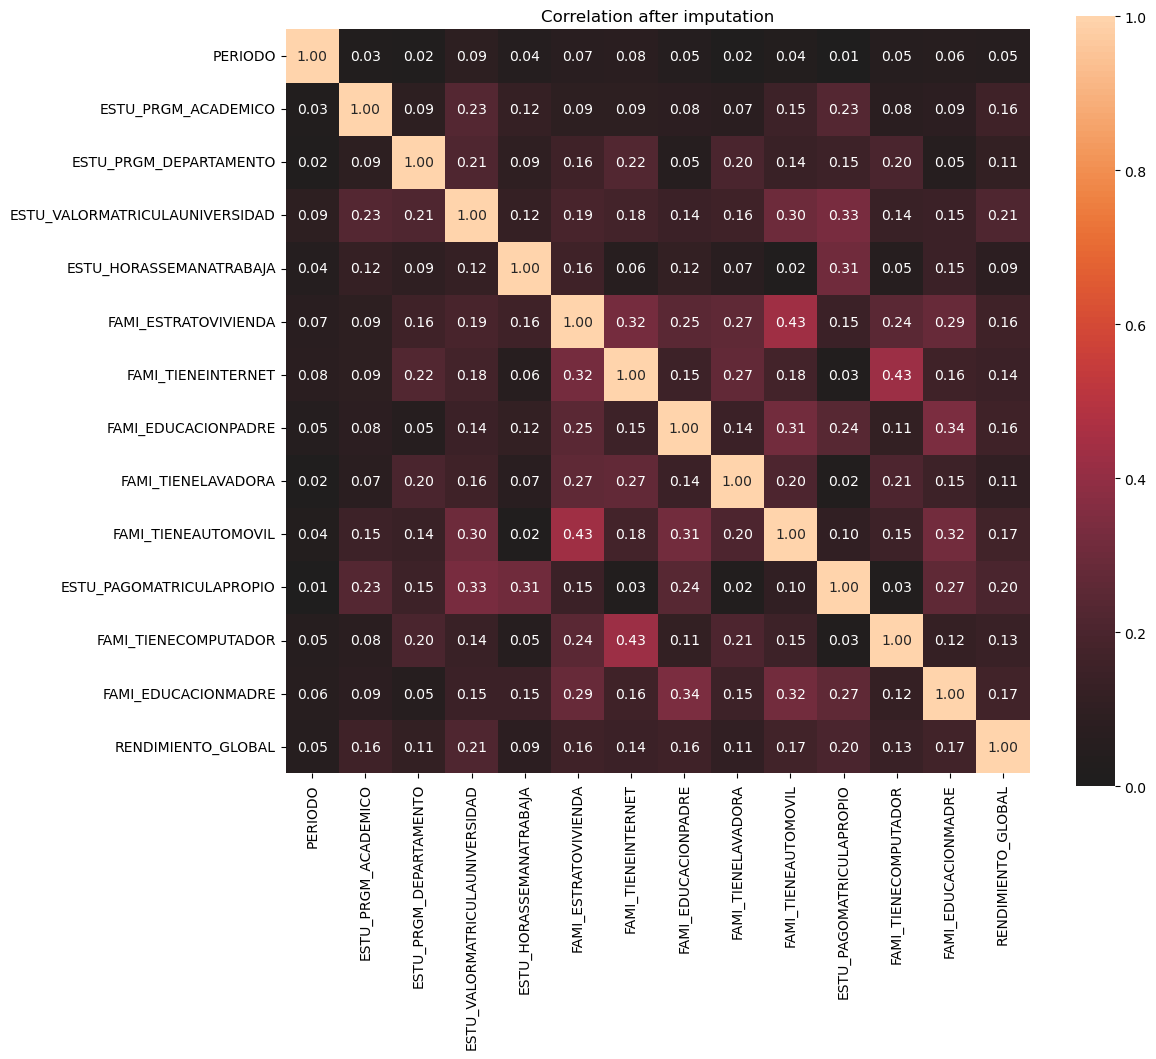

In [19]:
associations(df_train, title='Correlation after imputation', figsize=(12, 10))
plt.show()

#### Encoding
- Use **Target Encoding** on High Cardinality features
- Use **Ordinal Encoding** on `ESTRATO`, `EDUCACION`, `HORASTRABAJA`, `VALORMATRICULA`
- Use **One-Hot Encoding** on everything else

In [20]:
# Ordinal Encoding
custom_orders = [
    ['Sin Estrato', 'Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6'],
    ['No trabaja', 'Menos de 10 horas', 'Entre 11 y 20 horas', 'Entre 21 y 30 horas', 'Más de 30 horas'],
    ['No pagó matrícula', 'Menos de 500 mil', 'Entre 500 mil y menos de 1 millón', 'Entre 1 millón y menos de 2.5 millones',
    'Entre 2.5 millones y menos de 4 millones', 'Entre 4 millones y menos de 5.5 millones', 'Entre 5.5 millones y menos de 7 millones',
    'Más de 7 millones'],
    ['Ninguno', 'Primaria incompleta', 'Primaria completa', 'Secundaria (Bachillerato) incompleta', 'Secundaria (Bachillerato) completa',
    'Tecnica o tecnologica incompleta', 'Tecnica o tecnologica completa', 'Educacion profesional incompleta',
    'Educacion profesional completa', 'Postgrado'],
    ['Ninguno', 'Primaria incompleta', 'Primaria completa', 'Secundaria (Bachillerato) incompleta', 'Secundaria (Bachillerato) completa',
    'Tecnica o tecnologica incompleta', 'Tecnica o tecnologica completa', 'Educacion profesional incompleta',
    'Educacion profesional completa', 'Postgrado']
]

ord_cols = ['FAMI_ESTRATOVIVIENDA','ESTU_HORASSEMANATRABAJA', 'ESTU_VALORMATRICULAUNIVERSIDAD',
           'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE']

ordinal_encoder = OrdinalEncoder(categories=custom_orders)

df_ord_train = pd.DataFrame(ordinal_encoder.fit_transform(df_train[ord_cols]), columns=ord_cols)
df_ord_test = pd.DataFrame(ordinal_encoder.fit_transform(df_test[ord_cols]), columns=ord_cols)

# Join new cols and remove previous non encoded cols
df_train = pd.concat([df_train.drop(columns=ord_cols, axis=1), df_ord_train], axis=1)
df_test = pd.concat([df_test.drop(columns=ord_cols, axis=1), df_ord_test], axis=1)

In [21]:
# Label encoding
label_encoder = LabelEncoder()

new_labels = pd.DataFrame(label_encoder.fit_transform(df_train['RENDIMIENTO_GLOBAL']), columns=['RENDIMIENTO_GLOBAL'])
df_train = pd.concat([df_train.drop('RENDIMIENTO_GLOBAL', axis=1), new_labels], axis=1)

In [22]:
# Target encoding
hc_cols = ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO']

target_encoder = TargetEncoder(target_type='multiclass', random_state=RANDOM_SEED)
target_encoder.fit(df_train[hc_cols], df_train['RENDIMIENTO_GLOBAL'])
new_cols_names = target_encoder.get_feature_names_out()

high_cardinality_train = pd.DataFrame(target_encoder.transform(df_train[hc_cols]), columns=new_cols_names)
high_cardinality_test = pd.DataFrame(target_encoder.transform(df_test[hc_cols]), columns=new_cols_names)

# Remove old cols
df_train = pd.concat([df_train.drop(hc_cols, axis=1), high_cardinality_train], axis=1)
df_test = pd.concat([df_test.drop(hc_cols, axis=1), high_cardinality_test], axis=1)

In [23]:
# One-Hot Encoding
df_train = pd.get_dummies(df_train, dtype=int)
df_test = pd.get_dummies(df_test, dtype=int)

In [24]:
df_train.shape

(692500, 28)

## Model Training

In [25]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

In [26]:
# Separate features and target
X = df_train.drop('RENDIMIENTO_GLOBAL', axis=1).values  # Features
y = df_train['RENDIMIENTO_GLOBAL'].values  # Target

# Split data into training and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [27]:
X_train.shape

(554000, 27)

In [28]:
# Function to create a class-specific dataset
def create_class_dataset(X, y, class_label):
    mask = (y == class_label)
    X_class = X[mask]
    y_class = y[mask]
    return tf.data.Dataset.from_tensor_slices((X_class, y_class))

# Create datasets for each class
num_classes = 4  # Adjust based on your specific number of classes
class_datasets = [create_class_dataset(X_train, y_train, class_label) for class_label in range(num_classes)]

# Batch each class-specific dataset
batch_size = 64 // num_classes  # Ensure total batch size is 64
class_datasets = [ds.shuffle(buffer_size=1024).batch(batch_size) for ds in class_datasets]

# Interleave class-specific batches to create balanced batches
balanced_train_dataset = tf.data.Dataset.sample_from_datasets(class_datasets, weights=[1.0/num_classes]*num_classes)
balanced_train_dataset = balanced_train_dataset.batch(64)

# Create the validation dataset (no need to balance)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(64)

# Ensure the input tensors have the correct dtype and shape
def preprocess(features, labels):
    features = tf.cast(features, dtype=tf.float32)
    labels = tf.cast(labels, dtype=tf.int32)
    return features, labels

balanced_train_dataset = balanced_train_dataset.map(preprocess)
val_dataset = val_dataset.map(preprocess)

2024-05-19 13:18:44.618538: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-05-19 13:18:44.618559: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-05-19 13:18:44.618563: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-05-19 13:18:44.618580: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-19 13:18:44.618591: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [29]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(27,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4)
])

# Define the learning rate scheduler
lr_scheduler = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9
)

# Compile the model with custom optimizer and scheduler
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_scheduler),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model with validation data
history = model.fit(balanced_train_dataset, epochs=100, validation_data=val_dataset, verbose=1)


Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, None, 27), dtype=float32). Expected shape (None, 27), but input has incompatible shape (None, None, 27)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, None, 27), dtype=float32)
  • training=True
  • mask=None

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

### Making Predictions

In [ ]:
# preds = base_model.predict(df_test)
# preds

In [ ]:
# # Decode predictions
# real_preds = label_encoder.inverse_transform(preds)
# real_preds

In [ ]:
# # Create submission
# df_submission = pd.DataFrame({
#     "ID": df_test_full.ID,
#     "RENDIMIENTO_GLOBAL": real_preds
# })

# df_submission